202599
50000
50000
50000
50001
torch.Size([40, 3, 64, 64])


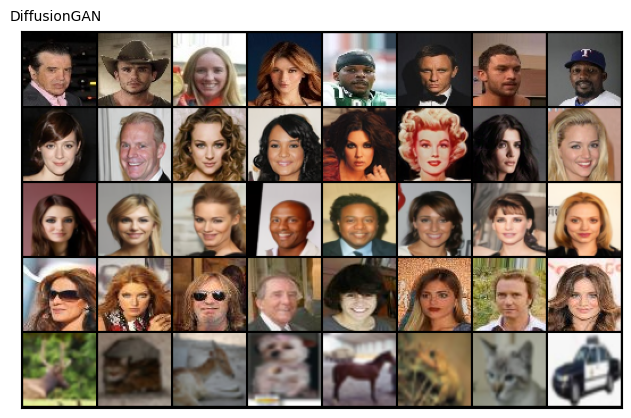

In [24]:
from os import listdir
from os.path import isfile, join
import random
random.seed(42)
import cv2
import torch
import torchvision
import matplotlib.pyplot as plt

celeb_org_path = "D:\Dokumente\SoftwareDev\MasterThesis\GIM-evaluation\original_64\images"
gan_path = "D:\Dokumente\SoftwareDev\MasterThesis\GIM-evaluation\generated_images\diffusionStyleGAN2\images"
vae_path = "D:\Dokumente\SoftwareDev\MasterThesis\GIM-evaluation\generated_images\diffusionVAE\images"
ddpm_path = "D:\Dokumente\SoftwareDev\MasterThesis\GIM-evaluation\generated_images\guidedDiffusion_IP\images"
cifar_path = "D:\Dokumente\SoftwareDev\MasterThesis\GIM-evaluation\generated_images\cifar-10\cifar-10"
paths = [celeb_org_path, gan_path, vae_path, ddpm_path, cifar_path]

n_per_row = 8
img_tensor = []

for path in paths:
    images = [img for img in listdir(path) if isfile(join(path, img))]
    print(len(images))
    chosen_imgs = random.choices(images, k=n_per_row)
    for img in chosen_imgs:
        img_arr = cv2.imread(join(path, img))
        if img_arr.shape[0] != 64 or img_arr.shape[1] != 64:
            img_arr = cv2.resize(img_arr, (64,64))
        img_tensor.append(torch.from_numpy(img_arr).permute(2,0,1)[None,:,:,:])
    
img_tensor = torch.vstack(img_tensor)
print(img_tensor.size())

grid_imgs = torchvision.utils.make_grid(img_tensor, nrow=n_per_row)
plt.imshow(grid_imgs.permute(1,2,0)[:,:,[2,1,0]])  
plt.text(-10, -10, "DiffusionGAN")
plt.tick_params(left = False, right = False, labelleft = False, labelbottom = False, bottom = False)   
plt.tight_layout()



<class 'numpy.ndarray'>


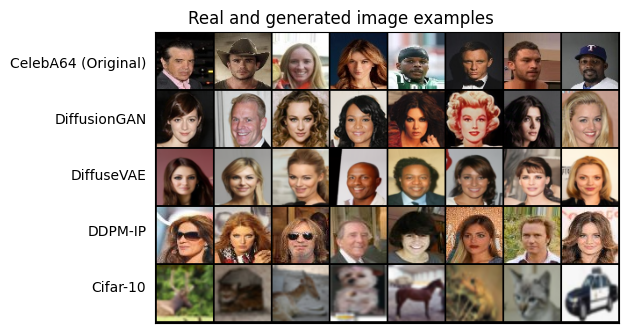

In [83]:
plt.imshow(grid_imgs.permute(1,2,0)[:,:,[2,1,0]])
for i,txt in enumerate(["CelebA64 (Original)","DiffusionGAN","DiffuseVAE","DDPM-IP","Cifar-10"]):
    plt.text(-10, 40 + 64 * i, txt, horizontalalignment='right', fontsize='medium')
plt.tick_params(left = False, right = False, labelleft = False, labelbottom = False, bottom = False)
fig = plt.gcf()
size = fig.get_size_inches()*fig.dpi # size in pixels   
print(type(size))
plt.title("Real and generated image examples", x=0.4 )
plt.tight_layout()
# save with vscode
# plt.savefig("img_samples.png", dpi=300)
plt.show()
